#####  Project Group 35: Devansh Mehta, Selena Shew, Megan Toi, Devon Vorster

# Classifying the Presence or Absence of the European Tree Frog due to  Environmental Factors in Poland


## Introduction

The European tree frog (Hyla arborea) is a common amphibian species found throughout Europe and western Asia (including Poland) that is known to inhabit areas with an abundance of vegetation that are near water. These frogs typically hibernate from September until early May, and will breed during April and May. During breeding, males call to attract females from an elevated position near to a source of water. The frogs lay their eggs among vegetation in shallow water, and within a few weeks the tadpoles will develop, but the speed at which this happens will depend on the temperature of the water. Following metamorphosis, the young froglets will remain near the water, but once they are larger, they will move into the trees. In the last few years, the European tree frog populations have considerably declined, due to loss of breeding habitats, habitat isolation and fragmentation, pollution, collection by people, and climate changes. Thus, protection of habitats seems to be the most important method of conservation of the European tree frog (“AmphibiaWeb - Hyla arborea”, 2020).

   The question we will attempt with our project is: can we use environmental factors to predict the presence or absence of European tree frogs in a given area? Specifically, we will be trying to predict the presence or absence of the European tree frog based on five factors: the number of water reservoirs in a given location (NR), the type of water reservoirs (TR), the presence of vegetation (VR), use of the water reservoirs (UR), and the maintenance status of the reservoirs (MR).

   The dataset that will be used to answer the aforementioned question is titled amphibians.csv, and was taken from the UCI Machine Learning Repository. The data set was originally gathered from an environmental impact assessment in Poland in preparation for two upcoming road projects.




In [1]:
#load neccessary libraries
library(tidyverse)
library(tidymodels)
library(repr)

#load and view data set
amphibians <- read_delim("data/amphibians.csv", delim = ";", skip = 2, , col_names = c("ID",'Motorway','SR','NR','TR','VR','SUR1','SUR2','SUR3','UR','FR','OR','RR','BR','MR','CR','Green_frogs','Brown_frogs','Common_toad','Fire-bellied_toad','Tree_frog','Common_newt','Great_crested_newt'))
head(amphibians)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.8      ✔ rsample   0.0.7 
✔ infer     0.5.3      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.1.3 
✔ parsnip   0.1.3    

ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,⋯,BR,MR,CR,Green_frogs,Brown_frogs,Common_toad,Fire-bellied_toad,Tree_frog,Common_newt,Great_crested_newt
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1,600,1,1,4,6,2,10,0,⋯,0,0,1,0,0,0,0,0,0,0
2,A1,700,1,5,1,10,6,10,3,⋯,1,0,1,0,1,1,0,0,1,0
3,A1,200,1,5,1,10,6,10,3,⋯,1,0,1,0,1,1,0,0,1,0
4,A1,300,1,5,0,6,10,2,3,⋯,0,0,1,0,0,1,0,0,0,0
5,A1,600,2,1,4,10,2,6,0,⋯,5,0,1,0,1,1,1,0,1,1
6,A1,200,1,5,1,6,6,10,1,⋯,0,0,1,0,0,0,0,0,0,0


In [2]:
glimpse(amphibians)

Rows: 189
Columns: 23
$ ID                  <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ Motorway            <chr> "A1", "A1", "A1", "A1", "A1", "A1", "A1", "A1", "…
$ SR                  <dbl> 600, 700, 200, 300, 600, 200, 500, 700, 750, 200,…
$ NR                  <dbl> 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1…
$ TR                  <dbl> 1, 5, 5, 5, 1, 5, 5, 5, 5, 12, 1, 14, 1, 1, 1, 1,…
$ VR                  <dbl> 4, 1, 1, 0, 4, 1, 0, 2, 1, 4, 4, 2, 1, 1, 3, 3, 4…
$ SUR1                <dbl> 6, 10, 10, 6, 10, 6, 6, 10, 6, 2, 2, 1, 2, 2, 2, …
$ SUR2                <dbl> 2, 6, 6, 10, 2, 6, 6, 6, 1, 7, 7, 2, 6, 6, 10, 1,…
$ SUR3                <dbl> 10, 10, 10, 2, 6, 10, 10, 9, 2, 6, 1, 7, 10, 10, …
$ UR                  <dbl> 0, 3, 3, 3, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0…
$ FR                  <dbl> 0, 1, 4, 4, 0, 0, 2, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0…
$ OR                  <dbl> 50, 75, 75, 25, 99, 50, 25, 100, 50, 75, 100, 100…
$ RR                  <dbl> 0,

## Methods and Results

As previously mentioned, we attempted to predict the presence or absence of the European tree frog based on various environmental factors. The dataset that we worked with, titled ‘amphibians.csv,’ was originally downloaded from the UCI Machine Learning Repository and based on a former environmental impact assessment in Poland. This dataset contained a total of 189 examined areas, which were deemed ‘occurrence sites’ for the purposes of the assessment. Through initial examination of the dataset, the metadata listed twenty-three variables total, with twenty-two being the different environmental factors that were considered for the environmental impact assessment. Since attempting to predict the presence or absence of tree frogs with all twenty-two environmental factors may not yield any significant results, the team decided to narrow down these factors to five upon further discussion. These five factors ultimately were NR, TR, VR, UR, and MR (Table 1). These five factors were selected for their direct impacts on the habitat quality of the European tree frogs, which would also directly impact their distribution and presence in the wild.
	
 

In [3]:
#Select required predictors and create final data set
amphibians_selected <- select(amphibians, NR, TR, UR, VR, MR, Tree_frog) %>%
                        mutate(Tree_frog = as_factor(Tree_frog))
head(amphibians_selected)

NR,TR,UR,VR,MR,Tree_frog
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,0,4,0,0
1,5,3,1,0,0
1,5,3,1,0,0
1,5,3,0,0,0
2,1,0,4,0,0
1,5,1,1,0,0


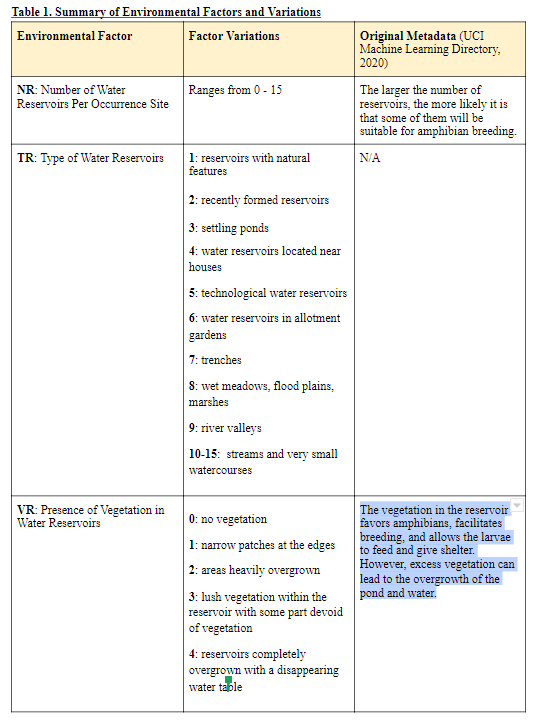

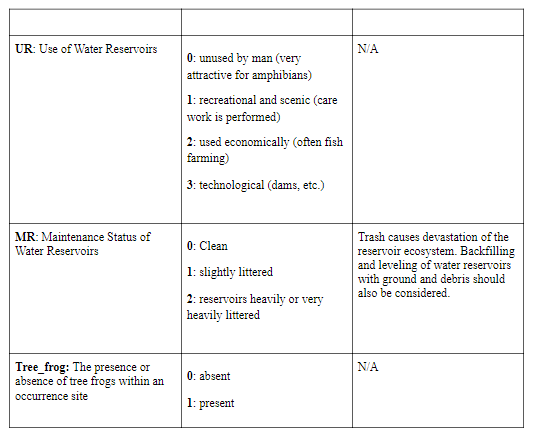

   After discussions were finalized, the data analysis began. The dataset was uploaded onto GitHub and shared with the entirety of the team, with R being the programming language used. After loading in tidyverse, tidymodels, and dplyr, the dataset was read into R using the read_delim function. Fortunately, the original dataset was already in a tidy format and did not require much wrangling or cleaning, except for the selection of our five specific factors as well as a sixth variable titled ‘Tree_frog,’ which denoted the presence or absence of the European tree frog for each occurrence site. The variable ‘Tree_frog’ was then mutated to be a factor data type. 
GGally was then loaded, and the function ggpairs was used in order to create an exploratory data visualization depicting the correlations between the five environmental factors and the variable ‘Tree_frog’ (Figure 1).

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



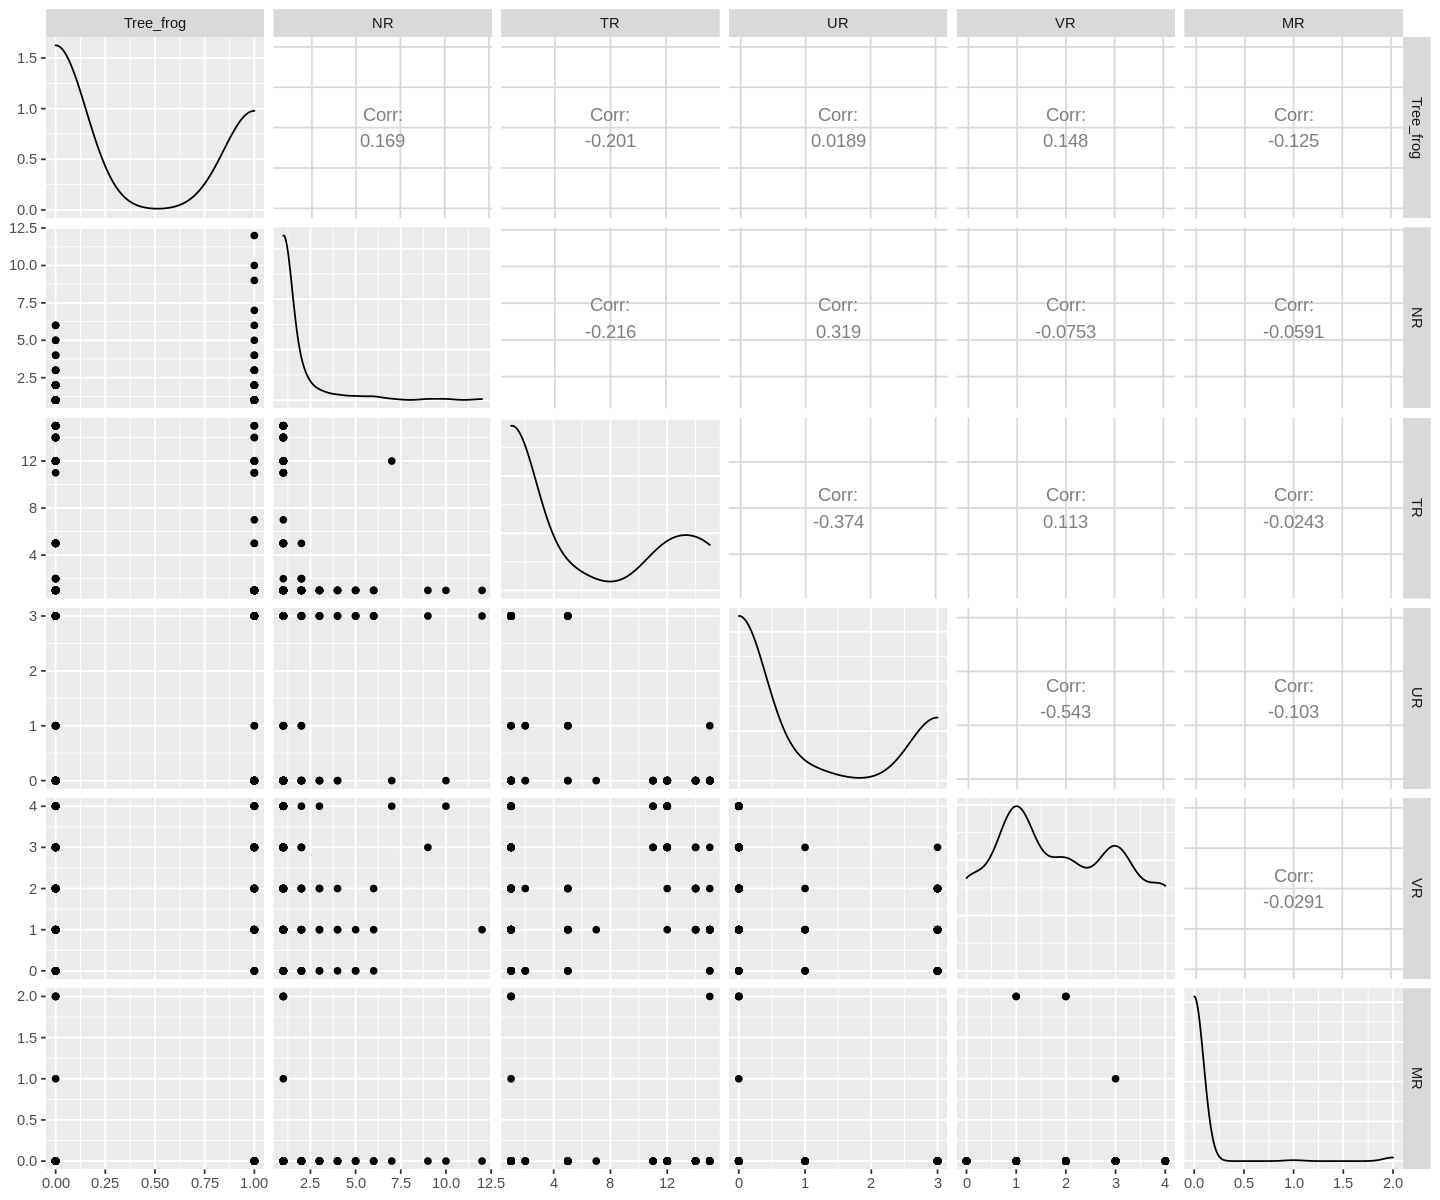

In [4]:
#Plot correlations between variables
library(GGally)
options(repr.plot.width = 12, repr.plot.height = 10)
plot_pairs <- amphibians %>% 
  select(Tree_frog, NR, TR, UR, VR, MR) %>% 
  ggpairs()
plot_pairs

**Figure 1.** The correlations between each of the environmental factors and the presence or absence of tree frogs. 

   Next came the creation of the prediction model. A k-nn nearest neighbours classification scheme was decided upon collectively as our aim was to predict the categorical labels of the presence or absence of the European tree frog. However, in order to yield a result with the greatest accuracy, the number of neighbours first had to be determined. In order to accomplish this, the amphibians dataset was first split into training (‘amphibians_training’) and testing (‘amphibians_testing’) data, with the training data being subjected to a five-fold cross-validation set. The training model and recipe were subsequently created, as well as a tibble to narrow down our number of neighbours from one to twenty. The recipe, model, folds, and tibble were then all put through the workflow function. Afterwards, accuracy was filtered for from our results and plotted against k-values in order to visualize and figure out the best number of neighbours. However, instead of solely relying upon the plot, we also decided to filter for the maximum mean value of accuracy, select for neighbours, and pull, thus obtaining the k-value to use for the finalized k-nn nearest neighbours model.



In [5]:
set.seed(1)

#create training and testing data
amphibians_split <- initial_split(amphibians_selected, prop = 0.70, strata = Tree_frog)
amphibians_training <- training(amphibians_split)
amphibians_testing <- testing(amphibians_split)
amphibians_vfold <- vfold_cv(amphibians_training, v = 5, strata = Tree_frog)

#create tuning recipe
amphibians_recipe <- recipe(Tree_frog ~ ., data = amphibians_training) %>%
                        step_scale(all_predictors()) %>%
                        step_scale(all_predictors())

#create KNN classification model spec
amphibians_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                    set_engine("kknn") %>%
                    set_mode("classification")

gridvals <- tibble(neighbors = seq(1,20))

#create workflow for tuning classifier
amphibians_results <- workflow() %>%
                        add_recipe(amphibians_recipe) %>%
                        add_model(amphibians_spec) %>%
                        tune_grid(resamples = amphibians_vfold, gridvals) %>%
                        collect_metrics()
amphibians_results

Warning message:
“The `...` are not used in this function but one or more objects were passed: ''”


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.6396011,5,0.02860376,Model01
2,roc_auc,binary,0.6197794,5,0.04482044,Model01
3,accuracy,binary,0.6327635,5,0.03936988,Model02
3,roc_auc,binary,0.6005147,5,0.04810864,Model02
5,accuracy,binary,0.6250712,5,0.03059994,Model03
5,roc_auc,binary,0.6087132,5,0.03717772,Model03
6,accuracy,binary,0.6019943,5,0.02357797,Model04
6,roc_auc,binary,0.5744485,5,0.03837582,Model04
8,accuracy,binary,0.5945869,5,0.04971816,Model05


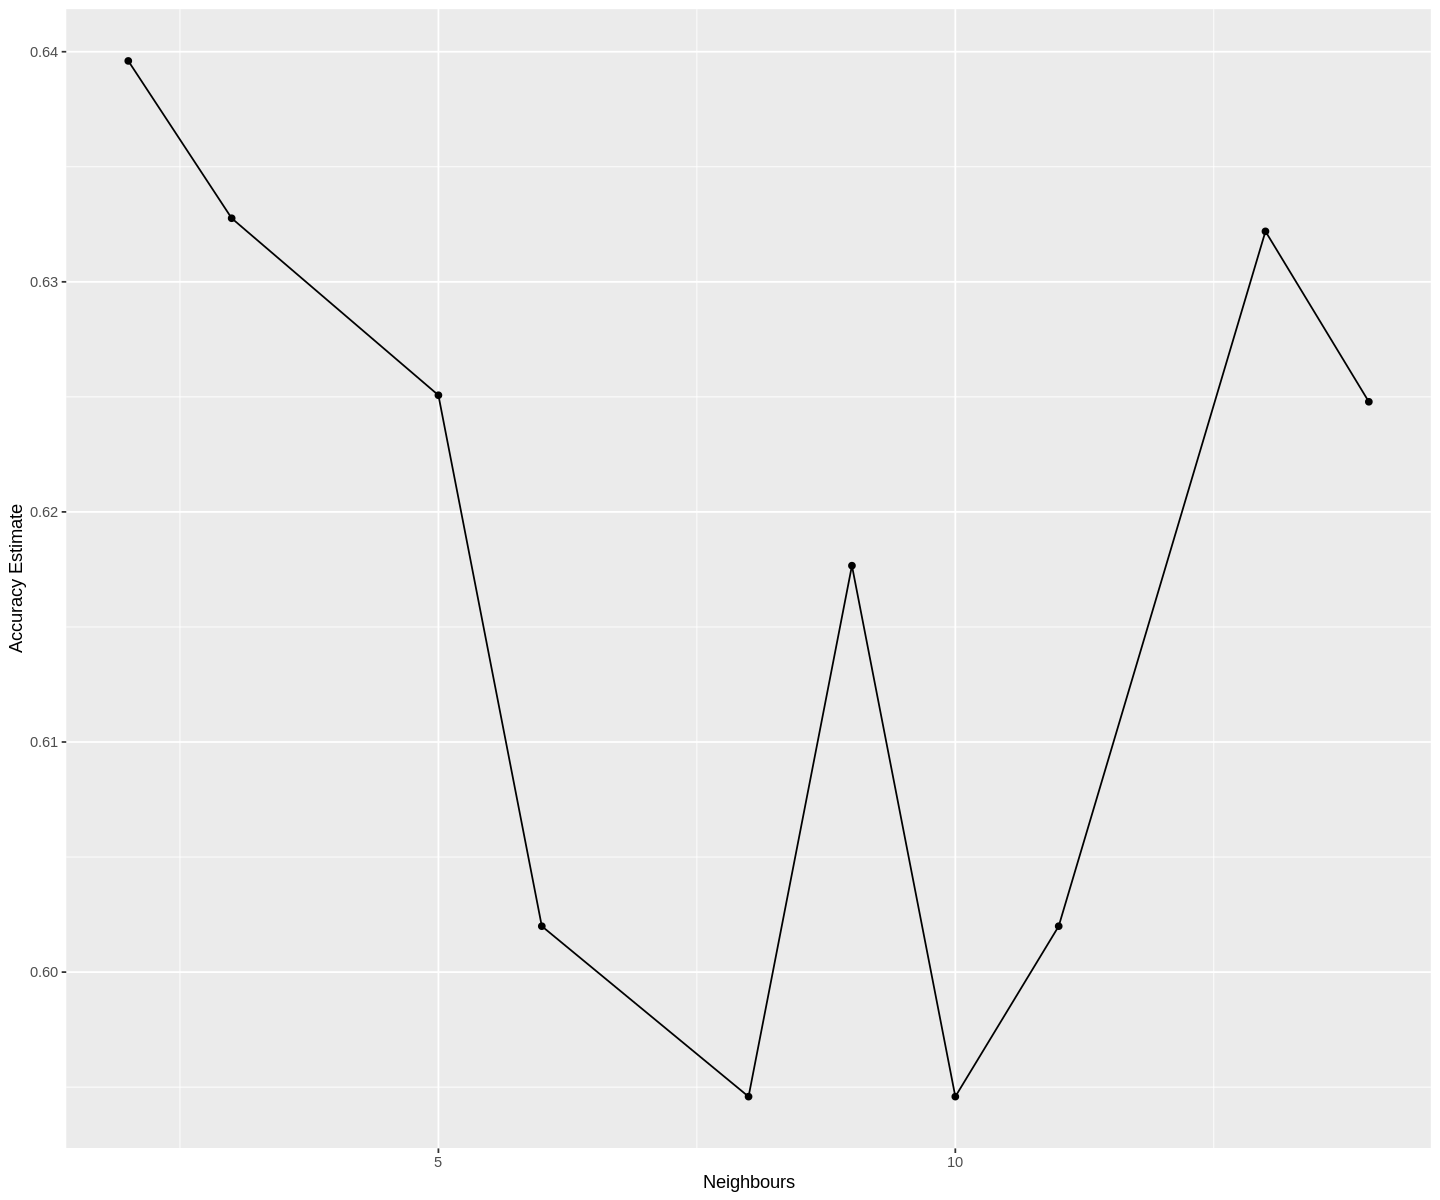

In [6]:
#Plot accuracie estimates for k values
accuracies = amphibians_results %>%
                filter(.metric == "accuracy")

accuracy_vs_K <- ggplot(accuracies, aes(x = neighbors, y = mean)) + 
                    geom_point() +
                    geom_line() +
                    labs(x = 'Neighbours', y = 'Accuracy Estimate')
accuracy_vs_K

**Figure 2.** The accuracy estimate on the y-axis versus the number of nearest neighbours on the x-axis. The k-value with the highest accuracy was determined to be two.

In [7]:
#get k value with the highest accuracy
k_max <- amphibians_results %>%
                    filter(.metric == "accuracy") %>%
                    filter(mean == max(mean)) %>%
                    select(neighbors) %>%
                    pull()
k_max

[1] 2

The k-value, which was concluded to be two, was used in the final model (Figure 2). This model as well as the previous recipe were once again put through the workflow function and fit onto the training data. After the workflow was trained, it was inserted into the predict function along with the testing data, passed onto the bind_cols function to add the predictions to the testing dataframe. This was finally passed onto the metrics function, specifying for truth as ‘Tree_frog’ and the estimate as ‘.pred_class.’ A confusion matrix was generated for our prediction results. The metrics function revealed an accuracy estimate of 0.6607 for our finalized classification scheme. This is supported by out confusion matrix which shows the same accuracy $\frac{31 + 6 }{1 + 15 + 4 + 6} = 0.6607$.

In [8]:
#Create model using k value which gives most accurate results
amphibians_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = k_max) %>%
                    set_engine("kknn") %>%
                    set_mode("classification")

amphibians_fit <- workflow() %>%
                        add_recipe(amphibians_recipe) %>%
                        add_model(amphibians_spec_2) %>%
                        fit(data = amphibians_training) 
amphibians_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~k_max,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3533835
Best kernel: rectangular
Best k: 2

In [9]:
#Evaluate model on the testing data and collect results
amphibians_test_predictions <- predict(amphibians_fit, amphibians_testing) %>% 
                                bind_cols(amphibians_testing) %>%
                                metrics(truth = Tree_frog, estimate = .pred_class)
head(amphibians_test_predictions)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6607143
kap,binary,0.1914894


In [10]:
#Evaluate model on the testing data and collect results in a confusion matrix
amphibians_test_predictions_matrix <- predict(amphibians_fit, amphibians_testing) %>% 
                                bind_cols(amphibians_testing) %>%
                                conf_mat(truth = Tree_frog, estimate = .pred_class)
head(amphibians_test_predictions_matrix)

$table
          Truth
Prediction  0  1
         0 31 15
         1  4  6

$dots
list()



While we now had a trained classifier for creating predictions of the presence or absence of tree frogs within various areas, we also wanted to discover how each of our five environmental factors individually affected the presence or absence of tree frogs. Even more so, as there were variations within each of the factors (eg. MR could be clean, slightly littered, or heavily littered), we wanted to understand whether there would be a greater or smaller proportion of tree frogs among these variations per environmental factor. Therefore, five different bar charts were created in order to showcase the proportion of the presence of tree frogs present for each variation associated with each factor (Figures 3-7). The five factors were each plotted along the x-axis, with proportions on the y-axis. The fill function was used to denote the presence or absence of tree frogs.

In [11]:
#Create data sets to plot different predictors

amphibians_seleced_summary_TR <- amphibians_selected %>%                             
                                group_by(TR, Tree_frog) %>%
                                summarize(n = n())

amphibians_seleced_summary_NR <- amphibians_selected %>%                             
                                group_by(NR, Tree_frog) %>%
                                summarize(n = n())

amphibians_seleced_summary_UR <- amphibians_selected %>%                             
                                group_by(UR, Tree_frog) %>%
                                summarize(n = n())

amphibians_seleced_summary_VR <- amphibians_selected %>%                             
                                group_by(VR, Tree_frog) %>%
                                summarize(n = n())

amphibians_seleced_summary_MR <- amphibians_selected %>%                             
                                group_by(MR, Tree_frog) %>%
                                summarize(n = n())

#Create plot for each predictor
options(repr.plot.width = 10, repr.plot.height = 6)

TR_plot <- ggplot(amphibians_seleced_summary_TR, aes(x = TR, y = n, fill = Tree_frog)) +
        geom_bar(stat = 'identity', position = "fill") +
        scale_y_continuous(labels = scales::percent) +
        labs(x = "Type of Water Reservoirs", y = "Proportion of Tree Frogs", fill = "Tree Frog") +
        ggtitle("Type of Water Reservoirs Vs Proportion of Tree Frogs") +
        theme(text = element_text(size = 15))

VR_plot <- ggplot(amphibians_seleced_summary_VR, aes(x = VR, y = n, fill = Tree_frog)) +
        geom_bar(stat = 'identity', position = "fill") +
        scale_y_continuous(labels = scales::percent) +
        labs(x = "Amount of Vegetation", y = "Proportion of Tree Frogs", fill = "Tree Frog") +
        ggtitle("Amount of Vegetation Vs Proportion of Tree Frogs") +
        theme(text = element_text(size = 15))

NR_plot <- ggplot(amphibians_seleced_summary_NR, aes(x = NR, y = n, fill = Tree_frog)) +
        geom_bar(stat = 'identity', position = "fill") +
        scale_y_continuous(labels = scales::percent) +
        labs(x = "Number of Water Reservoirs", y = "Proportion of Tree Frogs", fill = "Tree Frog") +
        ggtitle("Number of Water Reservoirs Vs Proportion of Tree Frogs") +
        theme(text = element_text(size = 15))

UR_plot <- ggplot(amphibians_seleced_summary_UR, aes(x = UR, y = n, fill = Tree_frog)) +
        geom_bar(stat = 'identity', position = "fill") +
        scale_y_continuous(labels = scales::percent) +
        labs(x = "Usage Type of Water Reservoirs", y = "Proportion of Tree Frogs", fill = "Tree Frog") +
        ggtitle("Usage Type of Water Reservoirs Vs Proportion of Tree Frogs") +
        theme(text = element_text(size = 15))

MR_plot <- ggplot(amphibians_seleced_summary_MR, aes(x = MR, y = n, fill = Tree_frog)) +
        geom_bar(stat = 'identity', position = "fill") +
        scale_y_continuous(labels = scales::percent) +
        labs(x = "Maintenance Level of Water Reservoirs", y = "Proportion of Tree Frogs", fill = "Tree Frog") +
        ggtitle("Maintenance Level of Water Reservoirs Vs Proportion of Tree Frogs") +
        theme(text = element_text(size = 15))

`summarise()` regrouping output by 'TR' (override with `.groups` argument)

`summarise()` regrouping output by 'NR' (override with `.groups` argument)

`summarise()` regrouping output by 'UR' (override with `.groups` argument)

`summarise()` regrouping output by 'VR' (override with `.groups` argument)

`summarise()` regrouping output by 'MR' (override with `.groups` argument)



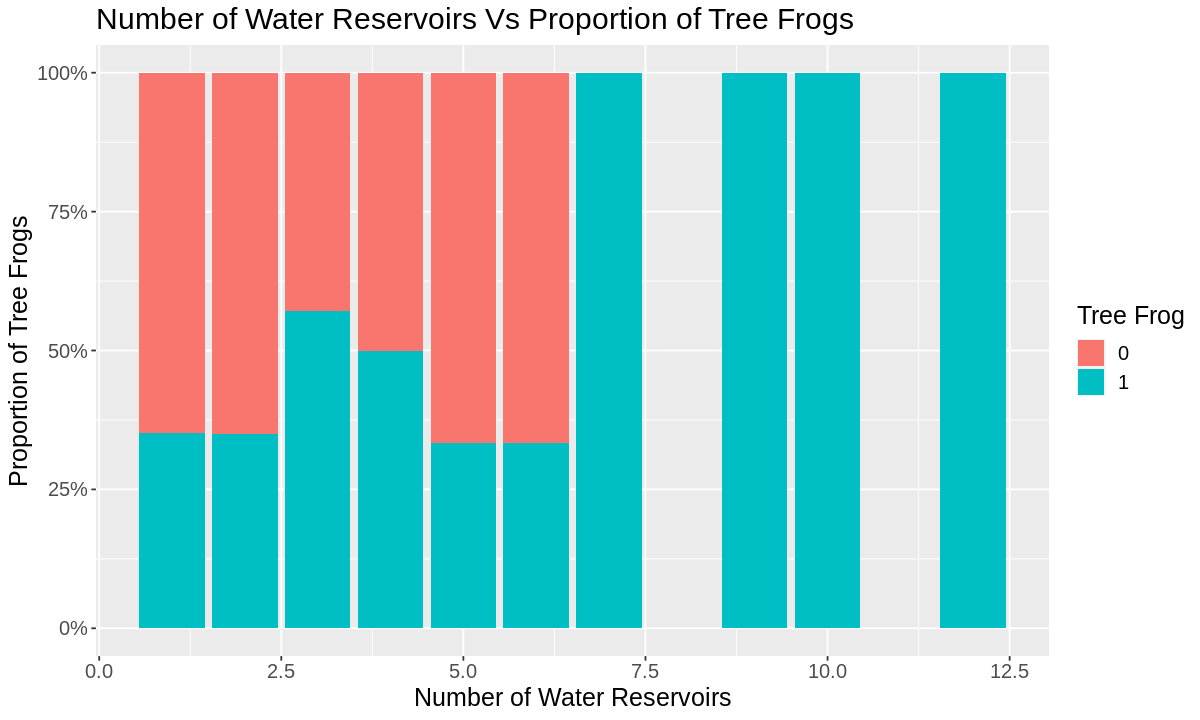

In [12]:
NR_plot

**Figure 2.** The proportion of the presence of tree frogs versus the total number of water reservoirs within each occurrence site. The presence of tree frogs is denoted in blue, or as the value of one, whereas absence is denoted in red, or zero. There is a higher proportion of tree frogs present in sites with a greater number of water reservoirs (six or more) compared to sites with a smaller number.

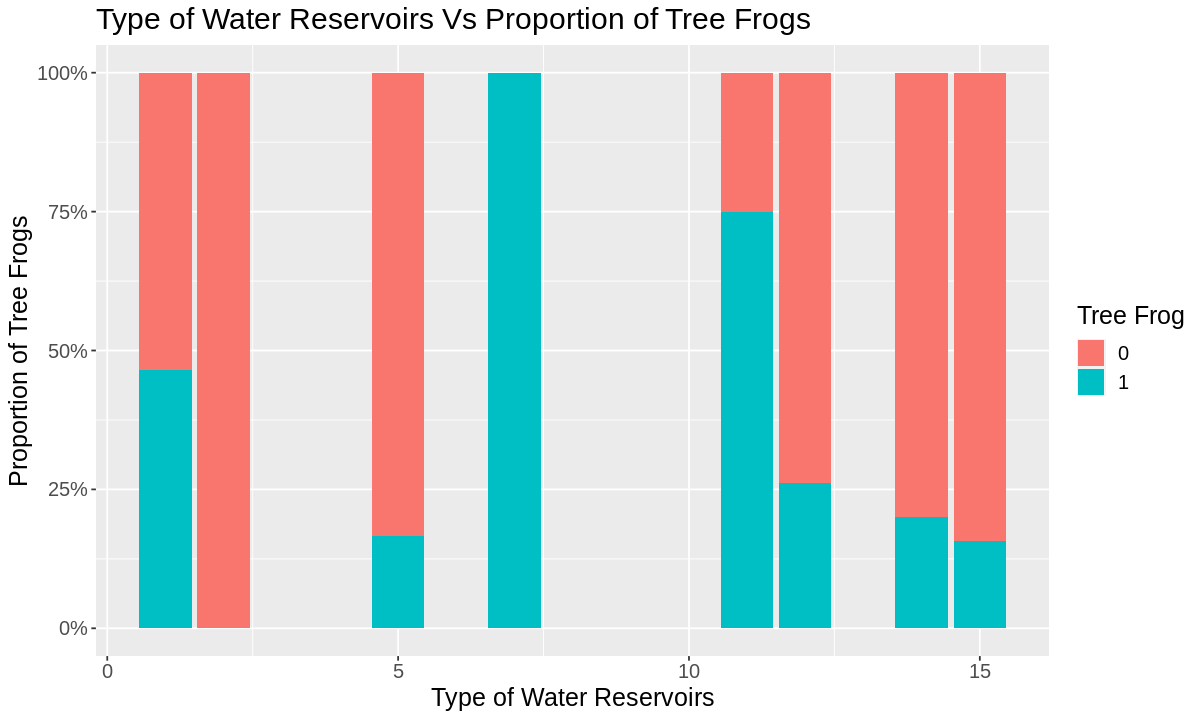

In [13]:
TR_plot

**Figure 3.** The proportion of the presence of tree frogs versus the type of water reservoirs. The presence of tree frogs is denoted in blue, or as the value of one, whereas absence is denoted in red, or zero. The reservoir types with the highest proportion of tree frogs are allotment gardens (6) and various streams (10-15).

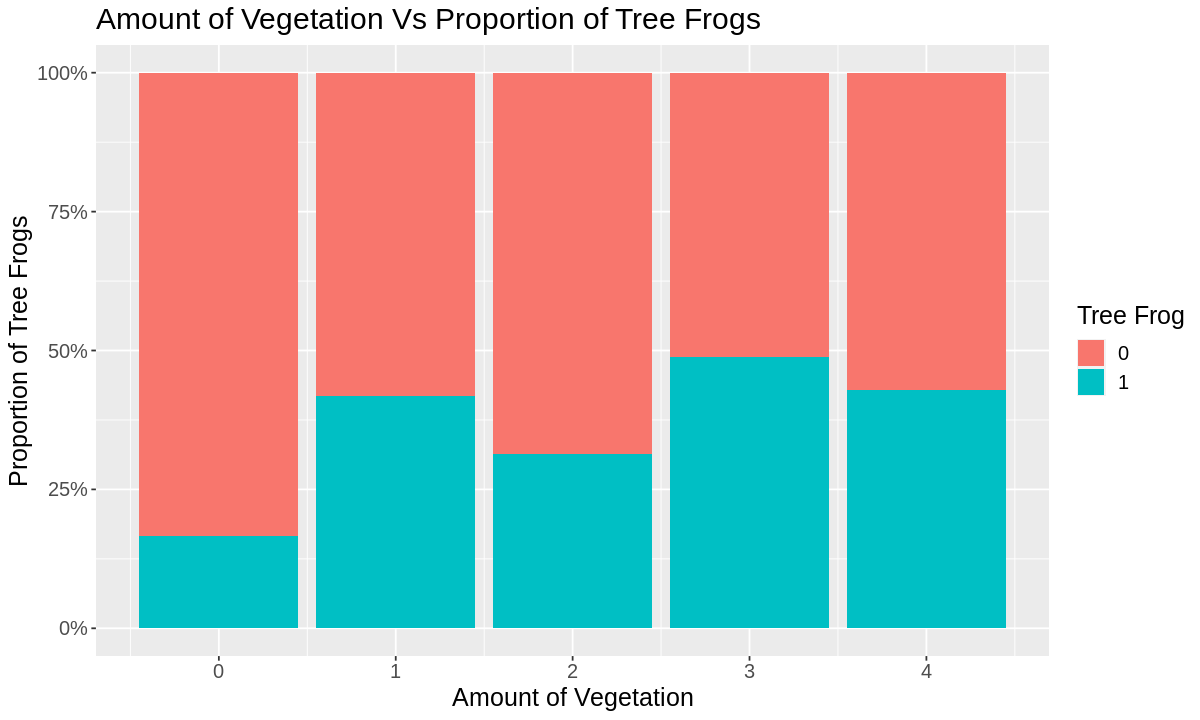

In [14]:
VR_plot

**Figure 4.** The proportion of the presence of tree frogs versus the amount of vegetation in water reservoirs. The presence of tree frogs is denoted in blue, or as the value of one, whereas absence is denoted in red, or zero. Water reservoirs with a lush amount of vegetation (3) yielded the highest proportion of tree frogs.

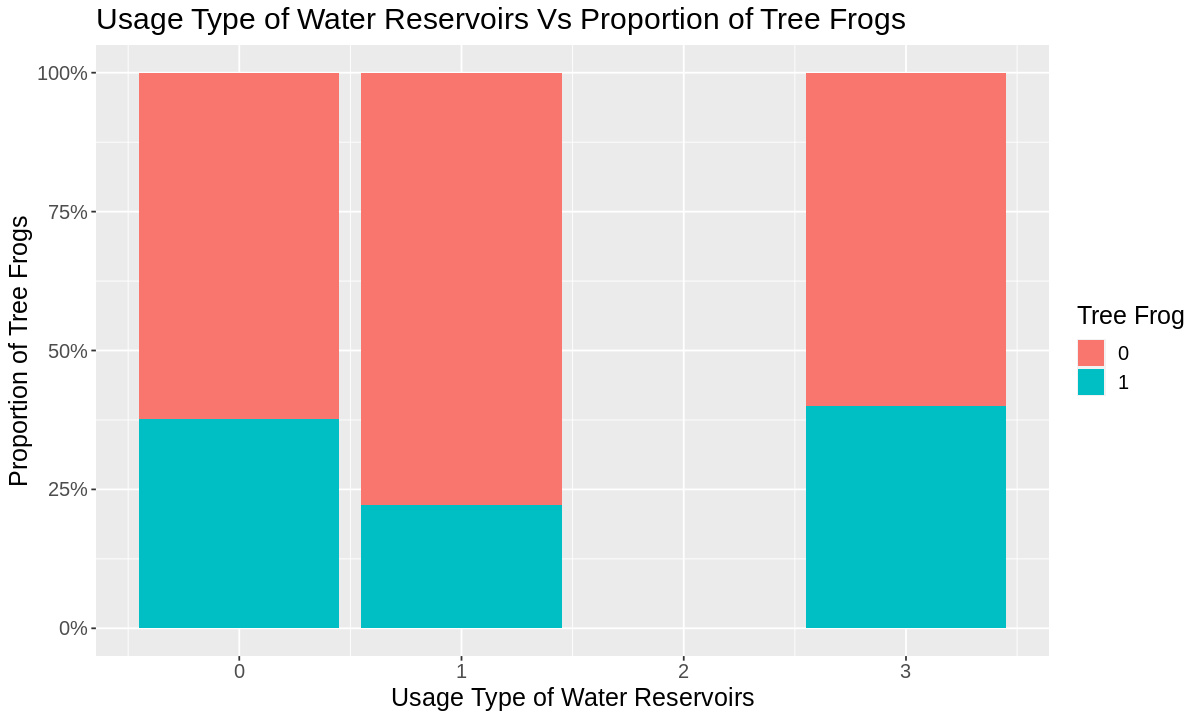

In [15]:
UR_plot

**Figure 5.** The proportion of the presence of tree frogs versus the usage type of water reservoirs. The presence of tree frogs is denoted in blue, or as the value of one. Absence is denoted in red, or zero. Water reservoirs that were technological (3) or completely unused by humans (0) had the highest proportion of European tree frogs present.


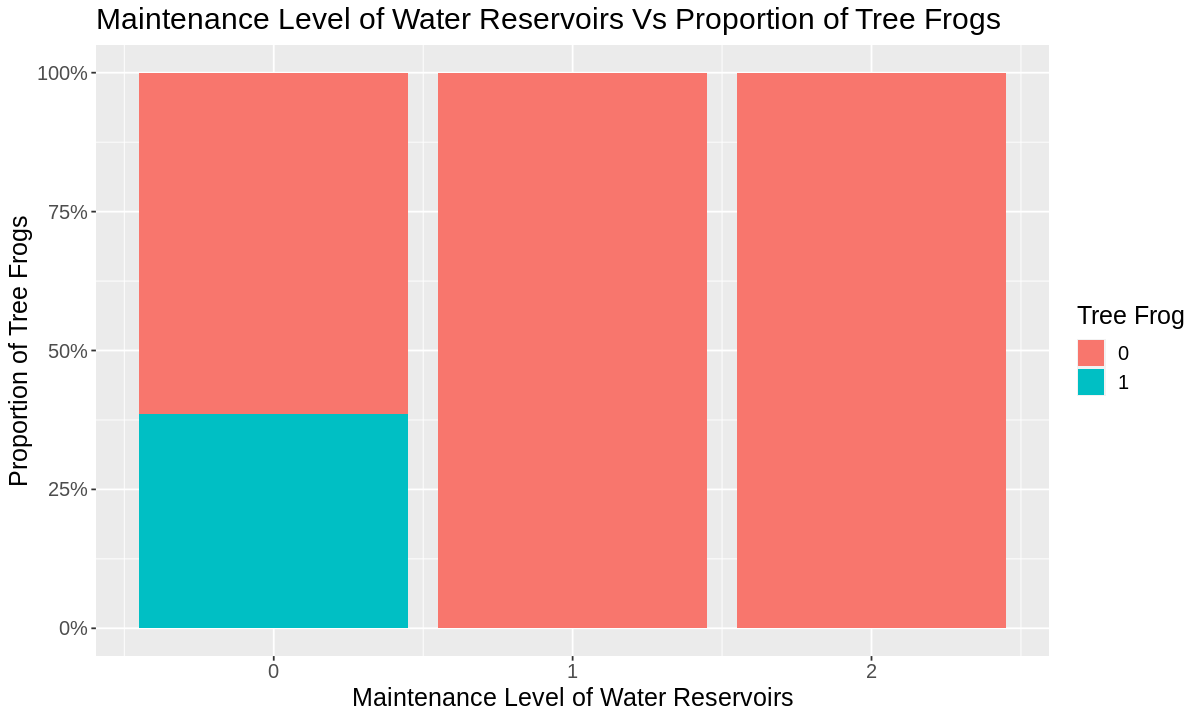

In [16]:
MR_plot

**Figure 6.** The proportion of the presence of tree frogs versus the maintenance level of water reservoirs. The presence of tree frogs is denoted in blue, or as the value of one. Absence is denoted in red, or zero. European tree frogs were only present in water reservoirs that were completely clean (0).

## Discussion

In this project we used a dataset titled amphibians.csv, taken from the UCI Machine Learning Repository, to predict the presence or absence of the European tree frog in a given area. Using environmental factors from the amphibians.csv data set, we were able to predict how NR, TR, VR, UR, FR, and MR, impact the presence or absence of European tree frogs. We found that there was a higher proportion of tree frogs present in sites with a greater number of water reservoirs with a lush amount of vegetation in allotment gardens and natural streams. In addition, we determined that the presence of tree frogs was also higher in water reservoirs that were completely clean and unused by humans. Furthermore, through using a k-nn nearest neighbours classifier, we were able to predict the presence of the European tree frog within various occurrence sites to an accuracy of 66.1%.

Our findings supported our expectation that there would be a greater proportion of European tree frogs in habitats with vegetation and water that are minimally impacted by humans. The present findings also align well with the findings of a study conducted by Ficetola and De Bernardi (2003) on amphibian populations during breeding season in a human-dominated landscape. This study found that the presence of amphibians in a given is strongly dependent on the habit quality and isolation, with the richest communities living is fish-free wetlands. They found that common species are better able to adapt to human exploitation of the landscape, while others are more sensitive to habitat alterations, therefore, if human alteration continues, only the species that are mobile and opportunistic will be able to persist.

These findings may provide guidance for field surveys and support for conservation decisions by identifying what environmental factors have the greatest potential to harm the animals in a given area. This could be implicated in environmental impact assessments when planning of future infrastructure projects in countries such as Poland. Additionally, understanding the impact of environmental factors on the European tree frog could be employed by wildlife conservation organizations to preserve natural habitats and to protect the future of other amphibian species. 

Further questions that this project could lead to include, determining which environmental factors have the greatest impact on the presence of European tree frogs. Furthermore, if we consider the breeding seasons of European tree frogs, we could potentially gain knowledge of when environmental changes have the greatest impact on populations. Future questions could use the same environmental factors as predictors to address whether other amphibian species react similarly to European tree frogs. 
In conclusion, after using the environmental factors,  TR, VR, UR, FR, and MR, we were able to predict that the proportion of European tree frogs in a given area is higher in response to a greater number of water reservoirs with a lush amount of vegetation in allotment gardens and natural streams, and water reservoirs that were completely clean and unused by humans.


## References

Amphibians Data Set. (2020). UCI Machine Learning Repository. Retrieved October 30, 2020, from http://archive.ics.uci.edu/ml/datasets/Amphibians


Ficetola, G.F., & De Bernardi, F. (2003). Amphibians in a human-dominated landscape: the community structure is related to habitat features and isolation. Biological Conservation, 199(2), 219-230. https://doi.org/10.1016/j.biocon.2003.11.004

Hyla arborea: Common Tree Frog. (1999). AmphibiaWeb. Retrieved December 1, 2020, from
http://amphibiaweb.org/species/718